# Dimensionality reduction

In this task you will practice dimensionality reduction.
Use code cells to answer the Tasks and Markdown cells for the Questions (Q's).

In [118]:
import sklearn
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
# from sklearn.model_selection import cross_val_score

# import sklearn
# print('sklearn: %s' % sklearn.__version__)
import warnings
warnings.filterwarnings("ignore")

# Load data

In [111]:
(X, y) = load_wine(return_X_y=True)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0,stratify=y)

Lets take a quick look at the data:

In [112]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,13.031792,2.332642,2.367170,19.701887,98.556604,2.282170,1.981509,0.375755,1.620849,5.150472,0.951321,2.617830,756.915094
std,0.821117,1.126702,0.271797,3.159023,13.749514,0.573592,1.013492,0.124869,0.592705,2.443026,0.216509,0.680315,326.825135
min,11.460000,0.890000,1.700000,12.000000,70.000000,1.250000,0.470000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.632500,2.210000,17.500000,88.000000,1.800000,1.017500,0.270000,1.252500,3.180000,0.802500,1.972500,510.000000
50%,13.135000,1.845000,2.350000,19.500000,97.000000,2.210000,2.035000,0.360000,1.545000,4.800000,0.960000,2.795000,675.000000
75%,13.677500,3.135000,2.580000,21.575000,105.750000,2.787500,2.855000,0.477500,1.970000,6.200000,1.097500,3.167500,1023.750000
max,14.830000,5.650000,3.230000,28.500000,151.000000,3.380000,5.080000,0.630000,3.580000,13.000000,1.420000,4.000000,1680.000000


# PCA + Random forest

Task 1: Use X_train, y_train to train a random forest with the default parameters. You can read more about the algorithm in SKlearn's documentation.
Evaluate the algorithm using accuracy score and X_test, y_test.

In [113]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score

mean_on_nb_elt = 10

def get_rf_score():
    rfc = RF()
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return score


rf_score = get_rf_score()
print("RF score:{}%".format(rf_score * 100))
list_score = []
for i in range(mean_on_nb_elt):
    list_score.append(get_rf_score())
print("RF mean score:{}%".format(np.mean(list_score) * 100))

RF score:97.22222222222221%
RF mean score:94.72222222222223%


Task 2: Now do the same, but use PCA.

In this task, we want to keep all of the variance! No data is going to be discarded.
You are asked to use the maximal number of componenets for PCA.

Q1: Your co-worker says that the results should be at least as good as the results we had without PCA. Explain why might he say that.

Print the accuracy of Random forest + PCA.

#### answer

if we keep the same variance and only change the base vector we should not get worse prediction. Adjusting the base vector give hope to improve the prediction

In [116]:
# cpt = X_train.shape[0]*X_train.shape[1]
# print(cpt)
# pca = PCA(n_components=min(X_train.shape[0], X_train.shape[1]), svd_solver='full')
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)
pca = PCA()
pca.fit(X_train_scaled)
X_nd = pca.transform(X_train_scaled)
Test_nd = pca.transform(X_test_scaled)

clf = RF()
clf = clf.fit(X_nd, y_train)
y_pred = clf.predict(Test_nd)
score = accuracy_score(y_test, y_pred)
print("PCA + RF:{}%".format(score * 100))


PCA + RF:91.66666666666666%


In [120]:
# just a try using pipeline (I tried with and without: StandardScaler, Normalizer )

pipeline1 = Pipeline([("Scale", StandardScaler()), ("Pca", PCA()), ("Random Forest", RF())]) 
pipeline1.fit(X_train, y_train)
y_pred = pipeline1.predict (X_test)
score_pca_rf = accuracy_score(y_test, y_pred)
print("Pipeline - PCA + RF:{}%".format(score_pca_rf * 100))


Pipeline - PCA + RF:94.44444444444444%


In [121]:
pipeline1 = Pipeline([("Normalizer", Normalizer()),("Scale", StandardScaler()), ("Pca", PCA()), ("Random Forest", RF())]) 
pipeline1.fit(X_train, y_train)
y_pred = pipeline1.predict (X_test)
score_pca_rf = accuracy_score(y_test, y_pred)
print("Pipeline - PCA + RF:{}%".format(score_pca_rf * 100))

Pipeline - PCA + RF:93.05555555555556%


Q2: Did the results improve\stayed the same\got worse? 

#### answer

Result are not totally stable but it seems worse.
Just listen again PCA (coursera), we are supposed to first nomalize then scale before to use PCA

# PCA + logistice regression

Task 3: repeat task 1 with logistic regression.

Task 4: repeast task 2 with logistic regression.

In [107]:
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("LR score:{}%".format(score * 100))

LR score:95.83333333333334%


In [108]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)
pca = PCA()
pca.fit(X_train_scaled)
X_nd = pca.transform(X_train_scaled)
Test_nd = pca.transform(X_test_scaled)

lr = LogisticRegression()
lr.fit(X_nd, y_train)
y_pred = lr.predict(Test_nd)
score = accuracy_score(y_test, y_pred)
print("PCA + LR:{}%".format(score * 100))

PCA + LR:100.0%


In [109]:
# pipeline solution 
pipeline = Pipeline([("Scale", StandardScaler()), ("Pca", PCA()), ("LR", LogisticRegression())]) 
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
score_pca_lr = accuracy_score(y_test, y_pred)
print("Pipeline - PCA + LR:{}%".format(score_pca_lr * 100))

Pipeline - PCA + LR:100.0%


In [119]:
pipeline = Pipeline([("Normalizer", Normalizer()), ("Scale", StandardScaler()), ("Pca", PCA()), ("LR", LogisticRegression())]) 
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
score_pca_lr = accuracy_score(y_test, y_pred)
print("Pipeline - PCA + LR:{}%".format(score_pca_lr * 100))

Pipeline - PCA + LR:95.83333333333334%


Q3: Did the results improved\stayed the same\got worse?

#### answer

It get better. 100% is little bit weird. I didn't find my error (sometime I get a less with the same code)


PCA + LR seems perfect 

Q4: How can you explain the difference between answers to Q2 and Q3. Hint: think about the nature of Logistic regression and the main difference of Random forest from it.

Changing the base vectors (PCA) can improve regressions. 

# Visualizing

Task 5: Use locally linear embedding in sklearn to visualize the data. Plot the results.
Optimze the n_neighbors by running at least 5 times and use the best looking result you can find.

In [80]:
from tqdm.auto import tqdm
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

def search_best_fit(func, n_clusters, index_min, index_max):
    score_list = []
    for index in tqdm(range(index_min, index_max)):
        class_func = func(index)
        X_transformed = class_func.fit(X).transform(X)
#         y_pred = DBSCAN(eps=0.5, min_samples=50).fit_predict(X_transformed)        
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(X_transformed)
        y_pred = kmeans.predict(X_transformed)        
        score = adjusted_rand_score(y_pred, y)
        score_list.append(score)
    best_index = np.argmax(score_list) + index_min
    print(f"best score:{score_list[best_index - index_min]}, with index:{best_index}")
    return best_index
    


best score:0.4274627856395638, with index:15


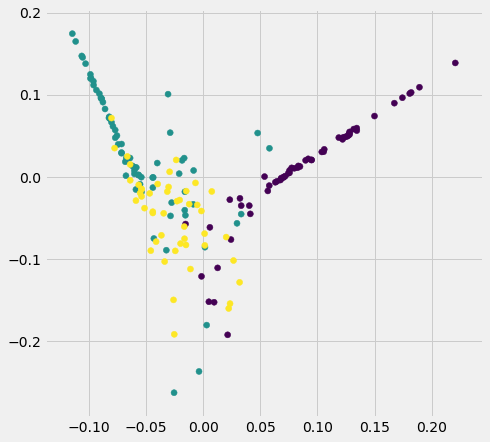

In [81]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.metrics.cluster import adjusted_rand_score

n_clusters = 3
ll_min = 1
ll_max = 100

best_ll_index = search_best_fit(LocallyLinearEmbedding, n_clusters, ll_min, ll_max)
X_transformed = LocallyLinearEmbedding(best_ll_index).fit(X).transform(X)
plt.figure(figsize=(7,7))
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=y)
plt.show()    

Task 6: Use t-SNE to visualize the data. Plot the results.

(178, 2)


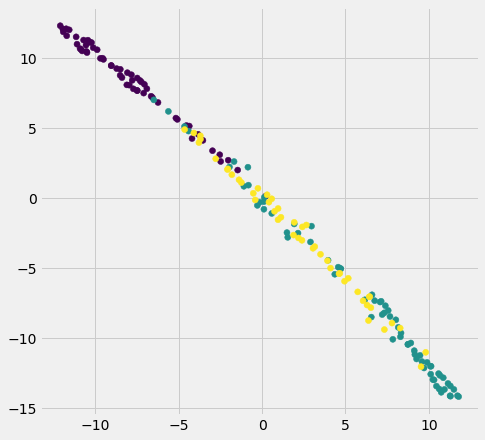

In [87]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)
print(X_embedded.shape)
plt.figure(figsize=(7,7))
plt.scatter(X_embedded[:,0],X_embedded[:,1], c=y)
plt.show()

Task 7: Use UMAP to visualize the data. Plot the results.

X.shape:(178, 13)
X_embedded.shape:(178, 2)


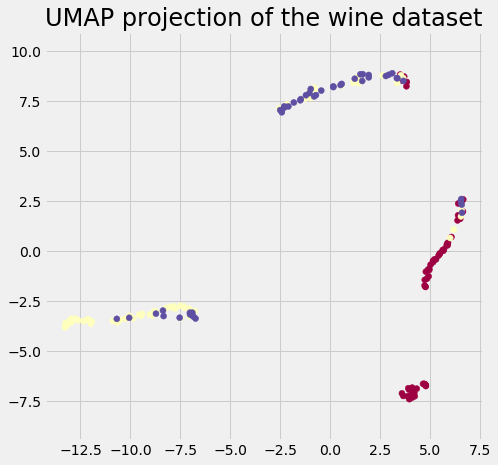

In [101]:
import umap

mapper = umap.UMAP().fit(X)
print(f"X.shape:{X.shape}")
X_embedded =  mapper.transform(X)
print(f"X_embedded.shape:{X_embedded.shape}")

plt.figure(figsize=(7,7))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the wine dataset', fontsize=24);
plt.show()


best score:0.4007269360356033, with index:8


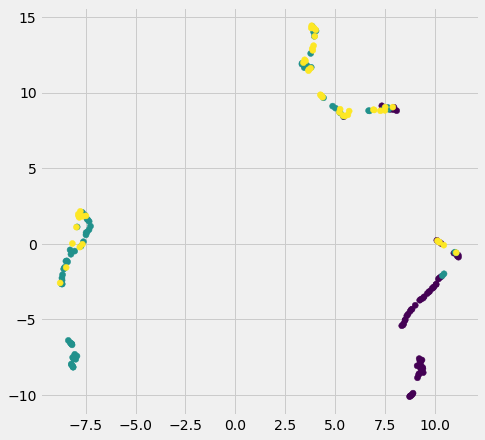

In [96]:
import umap

n_clusters = 3
umap_min = 2
umap_max = 20

best_umap_index = search_best_fit(umap.UMAP, n_clusters, umap_min, umap_max)
X_transformed = umap.UMAP(best_umap_index).fit(X).transform(X)
plt.figure(figsize=(7,7))
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=y)
plt.title('UMAP projection of the wine dataset', fontsize=24);
plt.show()

Q5: If we run one of this visualziaing algorithms various times with the default parameters, are we guranteed to see the same results? Why?

most of those algo start at a random point so it gives a different result